In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [5]:
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int32) # Iris Setosa?
per_clf = Perceptron()
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])


In [6]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.12.0'

In [7]:
keras.__version__

'2.12.0'

In [65]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [66]:
print("Train Data Shape: ", X_train_full.shape)
print("Train Data Type: ", X_train_full.dtype)
print("Test Data Shape: ", X_test.shape)
print("Test Data Type: ", X_test.dtype)


Train Data Shape:  (60000, 28, 28)
Train Data Type:  uint8
Test Data Shape:  (10000, 28, 28)
Test Data Type:  uint8


Though the data is partitioned into training and testing, we also need validation set from the trianing set.

In [67]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [46]:
X_TrainPlusValid = X_train_full[:] /255.0
y_TrainPlusValid = y_train_full[:] /255.0

In [54]:
X_train.shape

(55000, 28, 28)

In [68]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [69]:
print(class_names[y_train[0]])

Coat


In [70]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28,28]))
# model.add(keras.layers.Dense(300, activation="relu"))
# model.add(keras.layers.Dense(100, activation="relu"))
# model.add(keras.layers.Dense(10, activation="softmax"))

# OR

model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
  ])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [74]:
modelType1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
    ])

In [59]:
modelType1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                50240     
                                                                 
 dense_18 (Dense)            (None, 128)               8320      
                                                                 
 dense_19 (Dense)            (None, 256)               33024     
                                                                 
 dense_20 (Dense)            (None, 512)               131584    
                                                                 
 dense_21 (Dense)            (None, 512)               262656    
                                                                 
 dense_22 (Dense)            (None, 256)              

In [23]:
model.layers

In [24]:
model.layers[1].name

'dense'

In [26]:
model.get_layer('dense_2').name

'dense_2'

In [33]:
for layer in model.layers:
  print("To see all the weights and configurations: ")
  # print(layer.get_config(), layer.get_weights())


To see all the weights and configurations: 
To see all the weights and configurations: 
To see all the weights and configurations: 
To see all the weights and configurations: 


We have build the model now, we have to compile it.

In [60]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
    )

In [75]:
modelType1.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

In [61]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7134 - accuracy: 0.7627 - val_loss: 0.5039 - val_accuracy: 0.8344
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4868 - accuracy: 0.8294 - val_loss: 0.4421 - val_accuracy: 0.8490
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4402 - accuracy: 0.8453 - val_loss: 0.4129 - val_accuracy: 0.8604
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4141 - accuracy: 0.8550 - val_loss: 0.3965 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3930 - accuracy: 0.8617 - val_loss: 0.3951 - val_accuracy: 0.8620
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3770 - accuracy: 0.8669 - val_loss: 0.3666 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3632 - accuracy: 0.8713 - val_loss: 0.3639 - val_accuracy

In [50]:
history1 = model.fit(X_TrainPlusValid, y_TrainPlusValid, epochs=30, validation_split=.2)

Epoch 1/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0138 - accuracy: 0.0991 - val_loss: 0.0013 - val_accuracy: 0.1030
Epoch 2/30
1500/1500 [==============================] - 8s 5ms/step - loss: 8.4083e-04 - accuracy: 0.0993 - val_loss: 6.0415e-04 - val_accuracy: 0.1030
Epoch 3/30
1500/1500 [==============================] - 7s 5ms/step - loss: 4.6587e-04 - accuracy: 0.0993 - val_loss: 3.9177e-04 - val_accuracy: 0.1030
Epoch 4/30
1500/1500 [==============================] - 7s 5ms/step - loss: 3.2005e-04 - accuracy: 0.0993 - val_loss: 2.8854e-04 - val_accuracy: 0.1030
Epoch 5/30
1500/1500 [==============================] - 8s 5ms/step - loss: 2.4259e-04 - accuracy: 0.0993 - val_loss: 2.2773e-04 - val_accuracy: 0.1030
Epoch 6/30
1500/1500 [==============================] - 7s 4ms/step - loss: 1.9467e-04 - accuracy: 0.0993 - val_loss: 1.8778e-04 - val_accuracy: 0.1030
Epoch 7/30
1500/1500 [==============================] - 8s 5ms/step - loss: 1.6220e-04 - accurac

In [76]:
history2 = modelType1.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 21s 12ms/step - loss: 0.9840 - accuracy: 0.6545 - val_loss: 0.5796 - val_accuracy: 0.8014
Epoch 2/30
1719/1719 [==============================] - 18s 10ms/step - loss: 0.5299 - accuracy: 0.8106 - val_loss: 0.4528 - val_accuracy: 0.8428
Epoch 3/30
1719/1719 [==============================] - 20s 12ms/step - loss: 0.4515 - accuracy: 0.8368 - val_loss: 0.4309 - val_accuracy: 0.8438
Epoch 4/30
1719/1719 [==============================] - 19s 11ms/step - loss: 0.4085 - accuracy: 0.8510 - val_loss: 0.4175 - val_accuracy: 0.8462
Epoch 5/30
1719/1719 [==============================] - 17s 10ms/step - loss: 0.3853 - accuracy: 0.8589 - val_loss: 0.3888 - val_accuracy: 0.8606
Epoch 6/30
1719/1719 [==============================] - 18s 10ms/step - loss: 0.3671 - accuracy: 0.8664 - val_loss: 0.3667 - val_accuracy: 0.8642
Epoch 7/30
1719/1719 [==============================] - 17s 10ms/step - loss: 0.3510 - accuracy: 0.8721 - val_loss: 0.3443 -

Don't use Sigmoid function, instead use ReLU. If the difference between training set accuracy and validation set accuracy is LARGE, then the model is OVERFITTING.

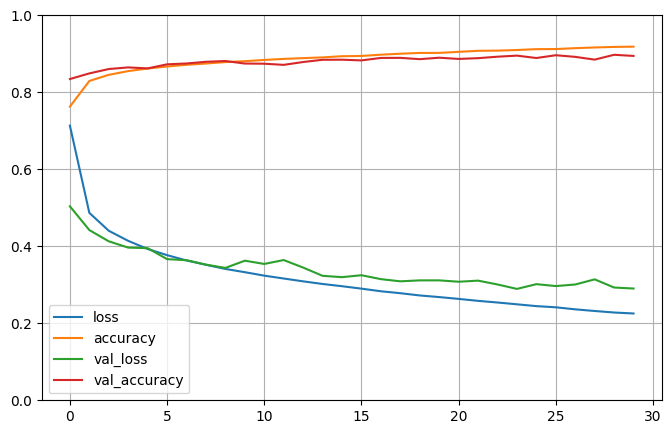

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

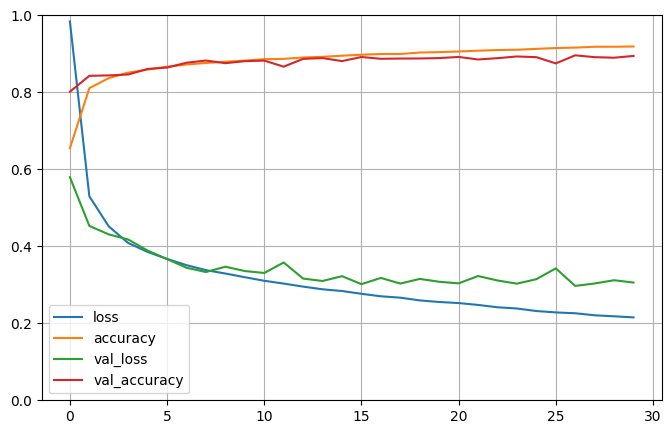

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [81]:
modelType1.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 60.4507 - accuracy: 0.7904


[60.45072555541992, 0.7904000282287598]

In [82]:
X_new = X_test[:3]
y_proba = modelType1.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 264ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [105]:
y_pred = modelType1.predict(X_new)
print(y_pred.dtype)
print(type(y_pred))
print(y_pred.shape)
print(len(y_pred))


for i in range(len(y_pred)):
  for j in range(len(y_pred[i])):
    if y_pred[i][j] == 1:
      print(class_names[j])

1/1 [==============================] - 0s 25ms/step
float32
<class 'numpy.ndarray'>
(3, 10)
3
Ankle boot
Pullover
Trouser


In [106]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)